<a href="https://colab.research.google.com/github/Next-Generation-Data-Science/Coursework-1/blob/main/Code%20-%2027.02.25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
!pip install -q missingno
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
!pip install -q shap
import shap
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Set seeds for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# **Step 1: Loading data**

In [ ]:
# Reading the data
file_path = 'https://raw.githubusercontent.com/Next-Generation-Data-Science/Coursework-1/refs/heads/main/owid-covid-data.csv'
df = pd.read_csv(file_path)

# **Step 2: Pre-Processing & Exploratory Data Analysis (EDA)**

In [ ]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-11,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-12,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-14,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060828,112096.199420,122.357073,122.713852,835.514337,...,33.097758,50.649390,3.106895,73.702098,0.722178,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666404
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636565,162240.412405,1508.778585,559.701663,1134.932641,...,13.853952,31.905236,2.549168,7.387914,0.149237,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892770
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.190000,0.100000,53.280000,0.390000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.450000
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100000,0.000000,0.000000,24.570000,...,22.600000,20.860000,1.300000,69.500000,0.600000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.875000
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.480000,0.000000,2.790000,295.090000,...,33.100000,49.540000,2.500000,75.050000,0.740000,6.336393e+06,6.815200e+03,8.130000,5.660000,1270.800000
75%,7.582720e+05,0.000000e+00,3.132900e+02,9.574000e+03,0.000000,3.140000,156770.190000,0.000000,56.250000,1283.820000,...,41.500000,82.500000,4.210000,79.460000,0.830000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.025000
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.960000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.520000


In [ ]:
# Find the minimum and maximum date
min_date = df['date'].min()
max_date = df['date'].max()
print(f"Date range: {min_date} to {max_date}")

Date range: 2020-01-01 to 2024-08-14


In [ ]:
# Number of unique locations
unique_locations = df['location'].nunique()
print(f"Number of unique locations: {unique_locations}")

Number of unique locations: 255


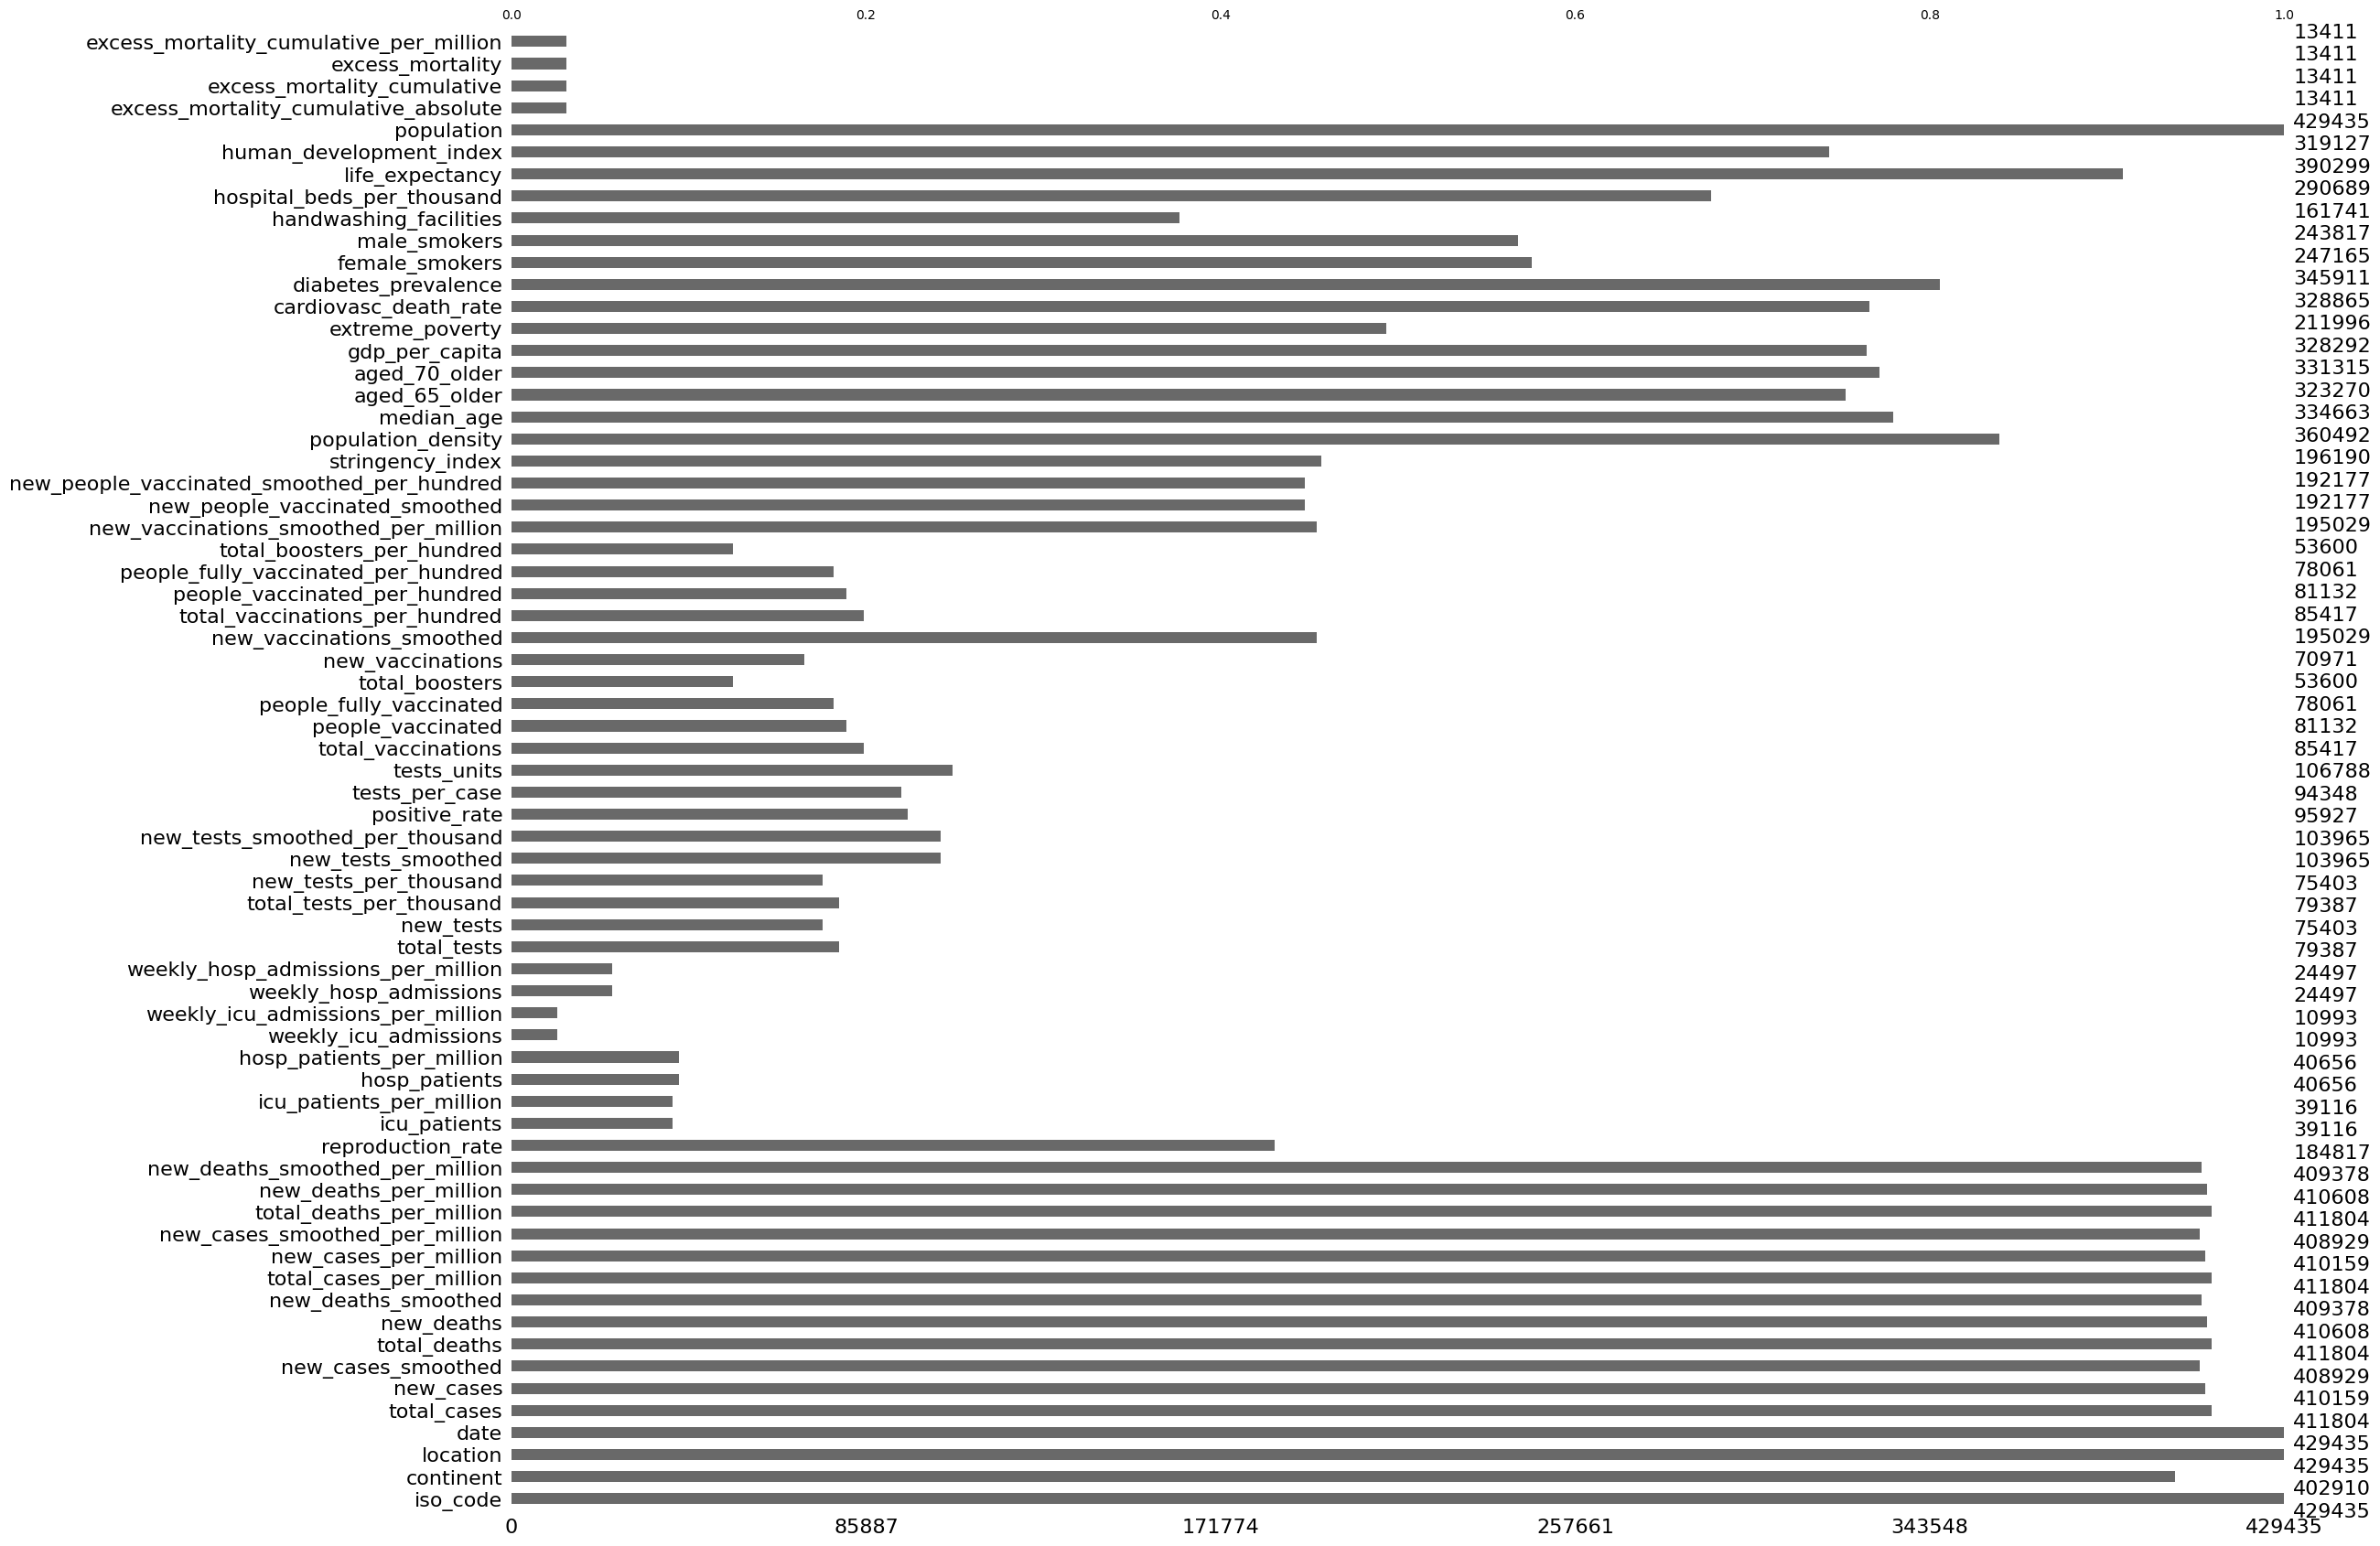

In [ ]:
# Bar chart to see missing values count
msno.bar(df)
plt.show()

## **UK data only**

In [ ]:
# Create a subset of the DataFrame for the UK
uk_df = df[df['location'] == 'United Kingdom']

uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1674 entries, 401777 to 403450
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    1674 non-null   object 
 1   continent                                   1674 non-null   object 
 2   location                                    1674 non-null   object 
 3   date                                        1674 non-null   object 
 4   total_cases                                 1674 non-null   float64
 5   new_cases                                   1674 non-null   float64
 6   new_cases_smoothed                          1669 non-null   float64
 7   total_deaths                                1674 non-null   float64
 8   new_deaths                                  1674 non-null   float64
 9   new_deaths_smoothed                         1669 non-null   float64
 10  total_case

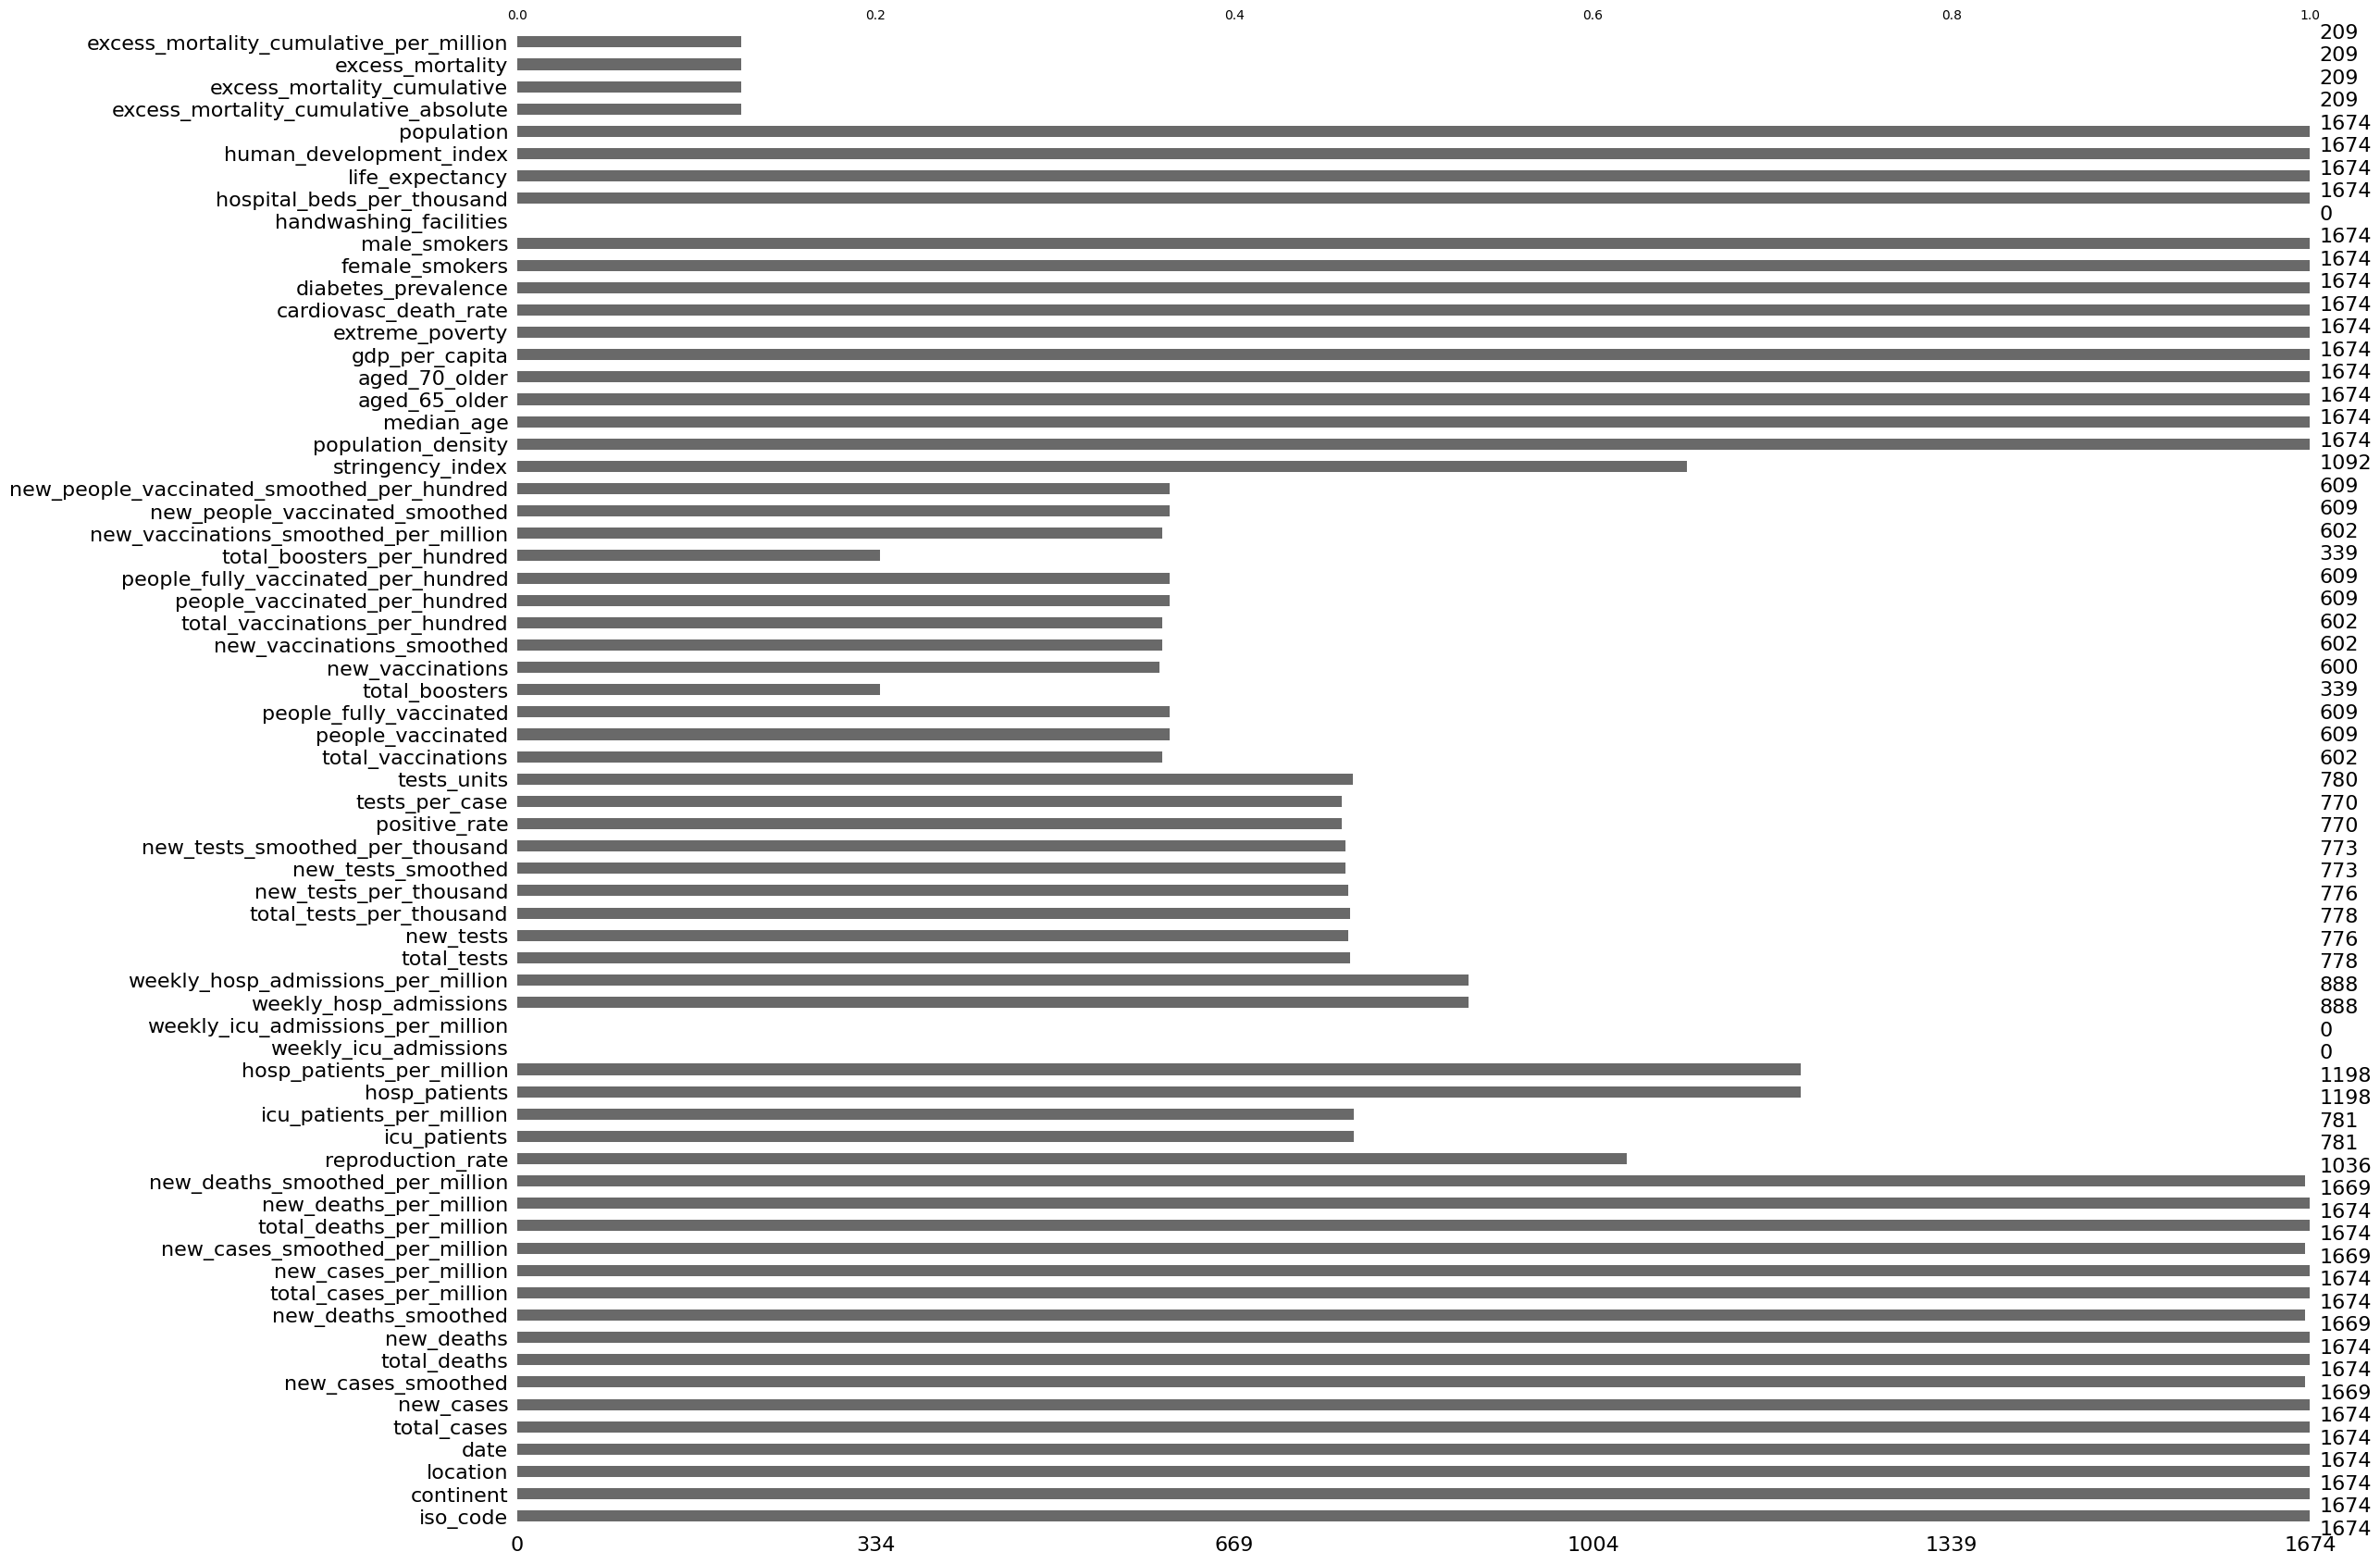

In [ ]:
# Bar chart to see missing values count
msno.bar(uk_df)
plt.show()

## **Selecting desired columns**

In [ ]:
## CLEANING & PREPROCESSING FUNCTION

# Function to selected desired columns and remove any NaNs
def cleaning_data_uk(df):

  # Creating copy of data
  cleaned_df = df.copy()

  # Convert 'date' column to datetime format
  cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])

  # Keep only the columns specified by index
  cleaned_df = cleaned_df[['date'] + cleaned_df.columns[[2, 4, 5, 7, 8] + list(range(48,58)) + list(range(59,63))].tolist()]

  # Return the cleaned dataframe
  return cleaned_df

cleaned_uk_df = cleaning_data_uk(uk_df)

In [ ]:
cleaned_uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1674 entries, 401777 to 403450
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        1674 non-null   datetime64[ns]
 1   location                    1674 non-null   object        
 2   total_cases                 1674 non-null   float64       
 3   new_cases                   1674 non-null   float64       
 4   total_deaths                1674 non-null   float64       
 5   new_deaths                  1674 non-null   float64       
 6   population_density          1674 non-null   float64       
 7   median_age                  1674 non-null   float64       
 8   aged_65_older               1674 non-null   float64       
 9   aged_70_older               1674 non-null   float64       
 10  gdp_per_capita              1674 non-null   float64       
 11  extreme_poverty             1674 non-null   float64   

**Description of each column selected:** (taken from [OWID GitHub README.md page](https://github.com/owid/covid-19-data/blob/master/public/data/README.md))


*   **`date`**: Date of observation.
*   **`location`**: Geographical location.
*   **`total_cases`**: Total confirmed cases of COVID-19. Counts can include probable cases, where reported.
*   **`new_cases`**: New confirmed cases of COVID-19. Counts can include probable cases, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA.
*   **`total_deaths`**: Total deaths attributed to COVID-19. Counts can include probable deaths, where reported.
*   **`new_deaths`**: New deaths attributed to COVID-19. Counts can include probable deaths, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA.
* **`population_density`**: Number of people divided by land area, measured in square kilometers, most recent year available.
* **`median_age`**: 	Median age of the population, UN projection for 2020.
* **`aged_65_older`**: 	Share of the population that is 65 years and older, most recent year available.
* **`aged_70_older`**: Share of the population that is 70 years and older in 2015.
* **`gdp_per_capita`**: Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available.
* **`extreme_poverty`**: Share of the population living in extreme poverty, most recent year available since 2010.
* **`cardiovasc_death_rate`**: Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people).
* **`diabetes_prevalence`**: Diabetes prevalence (% of population aged 20 to 79) in 2017.
* **`female_smokers`**: Share of women who smoke, most recent year available.
* **`male_smokers`**: Share of men who smoke, most recent year available.
* **`hospital_beds_per_thousand`**: Hospital beds per 1,000 people, most recent year available since 2010.
* **`life_expectancy`**: Life expectancy at birth in 2019.
* **`human_development_index`**: A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living. Values for 2019, imported from http://hdr.undp.org/en/indicators/137506.
* **`population`**: Population (latest available values). See https://github.com/owid/covid-19-data/blob/master/scripts/input/un/population_latest.csv for full list of sources.


## **Cases**

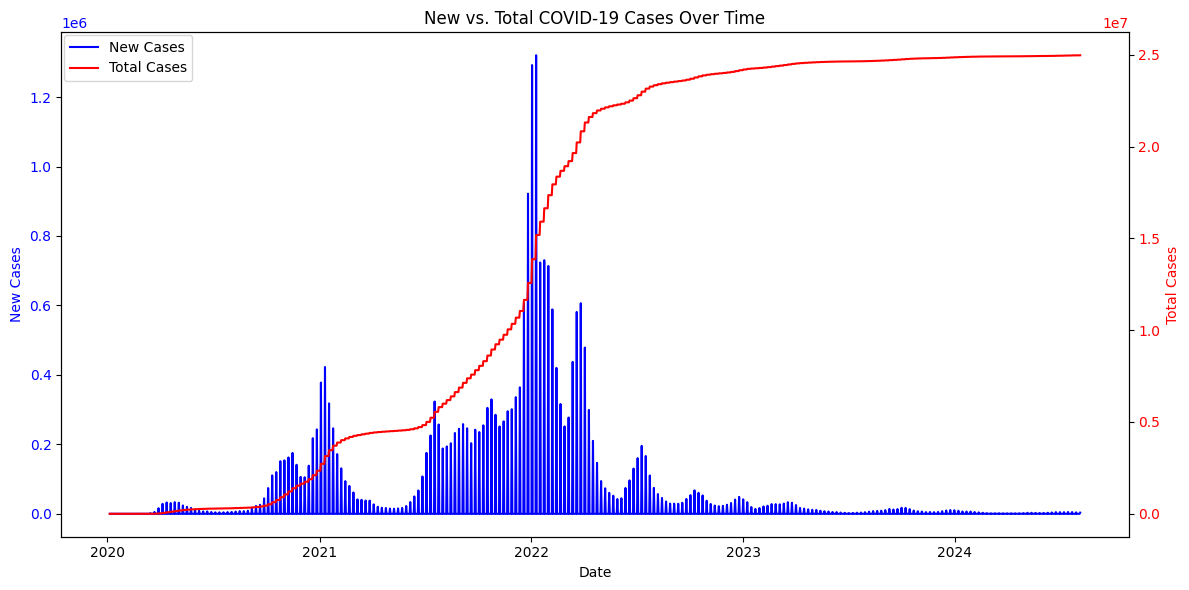

In [ ]:
# New vs. Total COVID-19 Cases Over Time

# Group data by date and sum new cases and total cases
cases_over_time = cleaned_uk_df.groupby('date').agg({'new_cases': 'sum', 'total_cases': 'sum'})

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot new cases on the first y-axis
ax1.plot(cases_over_time.index, cases_over_time['new_cases'], color='blue', label='New Cases')
ax1.set_xlabel('Date')
ax1.set_ylabel('New Cases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for total cases
ax2 = ax1.twinx()
ax2.plot(cases_over_time.index, cases_over_time['total_cases'], color='red', label='Total Cases')
ax2.set_ylabel('Total Cases', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Customize the plot
plt.title('New vs. Total COVID-19 Cases Over Time')
fig.legend(loc="upper left", bbox_to_anchor=(0.052, 0.945))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Deaths**

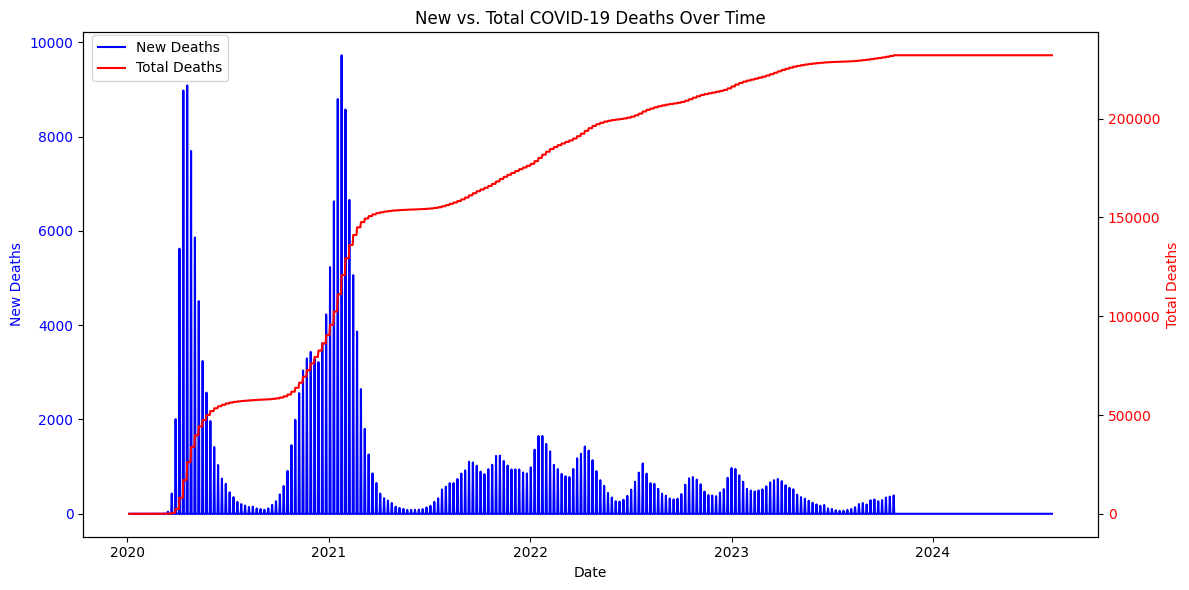

In [ ]:
# New vs. Total COVID-19 deaths Over Time

# Group data by date and sum new cases and total cases
cases_over_time = cleaned_uk_df.groupby('date').agg({'new_deaths': 'sum', 'total_deaths': 'sum'})

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot new cases on the first y-axis
ax1.plot(cases_over_time.index, cases_over_time['new_deaths'], color='blue', label='New Deaths')
ax1.set_xlabel('Date')
ax1.set_ylabel('New Deaths', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for total cases
ax2 = ax1.twinx()
ax2.plot(cases_over_time.index, cases_over_time['total_deaths'], color='red', label='Total Deaths')
ax2.set_ylabel('Total Deaths', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Customize the plot
plt.title('New vs. Total COVID-19 Deaths Over Time')
fig.legend(loc="upper left", bbox_to_anchor=(0.075, 0.945))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Find the minimum and maximum date
min_date = cleaned_uk_df['date'].min()
max_date = cleaned_uk_df['date'].max()
print(f"Date range: {min_date} to {max_date}")

Date range: 2020-01-05 00:00:00 to 2024-08-04 00:00:00


In [ ]:
# Find the first date with a non-zero value in 'new_deaths'
first_nonzero_death_date = cleaned_uk_df[cleaned_uk_df['new_deaths'] != 0]['date'].min()
print(f"The first date with a non-zero value in 'new_deaths' is: {first_nonzero_death_date}")

The first date with a non-zero value in 'new_deaths' is: 2020-02-02 00:00:00


In [ ]:
# Find the last date with a non-zero value in 'new_deaths'
last_nonzero_death_date = cleaned_uk_df[cleaned_uk_df['new_deaths'] != 0]['date'].max()
print(f"The last date with a non-zero value was recorded in 'new_deaths' is: {last_nonzero_death_date}")

The last date with a non-zero value was recorded in 'new_deaths' is: 2023-10-22 00:00:00


In [ ]:
# Removing all data before 2020-02-02 and after 2023-10-22
cleaned_uk_df_2 = cleaned_uk_df[(cleaned_uk_df['date'] >= '2020-02-02') & (cleaned_uk_df['date'] <= '2023-10-22')]

In [ ]:
cleaned_uk_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 401805 to 403163
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        1359 non-null   datetime64[ns]
 1   location                    1359 non-null   object        
 2   total_cases                 1359 non-null   float64       
 3   new_cases                   1359 non-null   float64       
 4   total_deaths                1359 non-null   float64       
 5   new_deaths                  1359 non-null   float64       
 6   population_density          1359 non-null   float64       
 7   median_age                  1359 non-null   float64       
 8   aged_65_older               1359 non-null   float64       
 9   aged_70_older               1359 non-null   float64       
 10  gdp_per_capita              1359 non-null   float64       
 11  extreme_poverty             1359 non-null   float64   

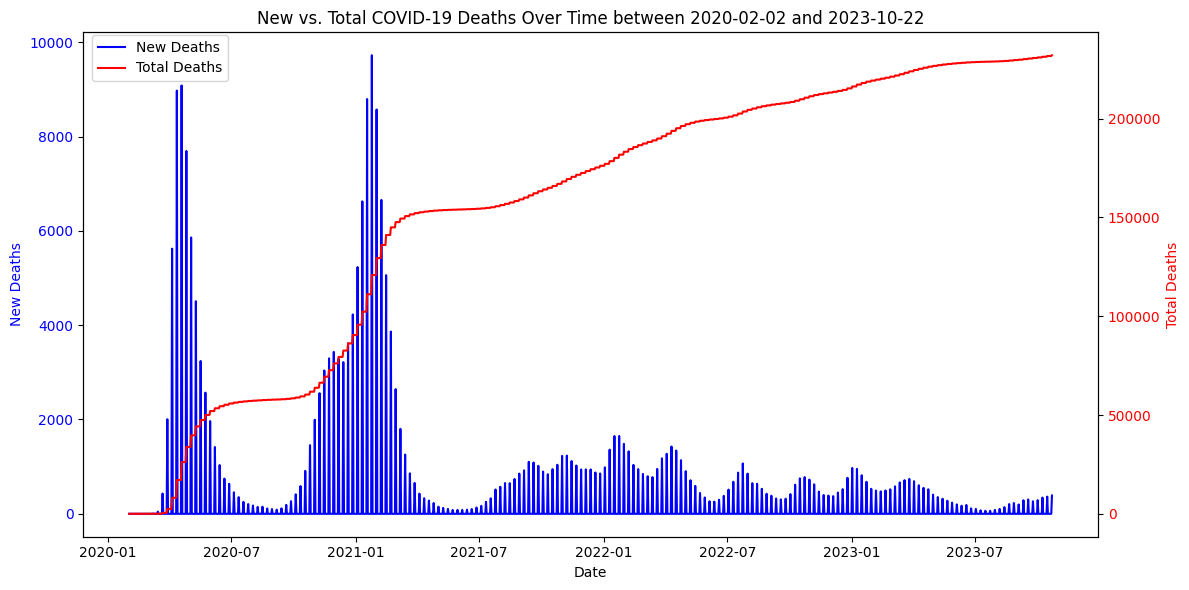

In [ ]:
# New vs. Total COVID-19 deaths Over Time

# Group data by date and sum new cases and total cases
cases_over_time = cleaned_uk_df_2.groupby('date').agg({'new_deaths': 'sum', 'total_deaths': 'sum'})

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot new cases on the first y-axis
ax1.plot(cases_over_time.index, cases_over_time['new_deaths'], color='blue', label='New Deaths')
ax1.set_xlabel('Date')
ax1.set_ylabel('New Deaths', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for total cases
ax2 = ax1.twinx()
ax2.plot(cases_over_time.index, cases_over_time['total_deaths'], color='red', label='Total Deaths')
ax2.set_ylabel('Total Deaths', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Customize the plot
plt.title('New vs. Total COVID-19 Deaths Over Time between 2020-02-02 and 2023-10-22')
fig.legend(loc="upper left", bbox_to_anchor=(0.075, 0.945))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

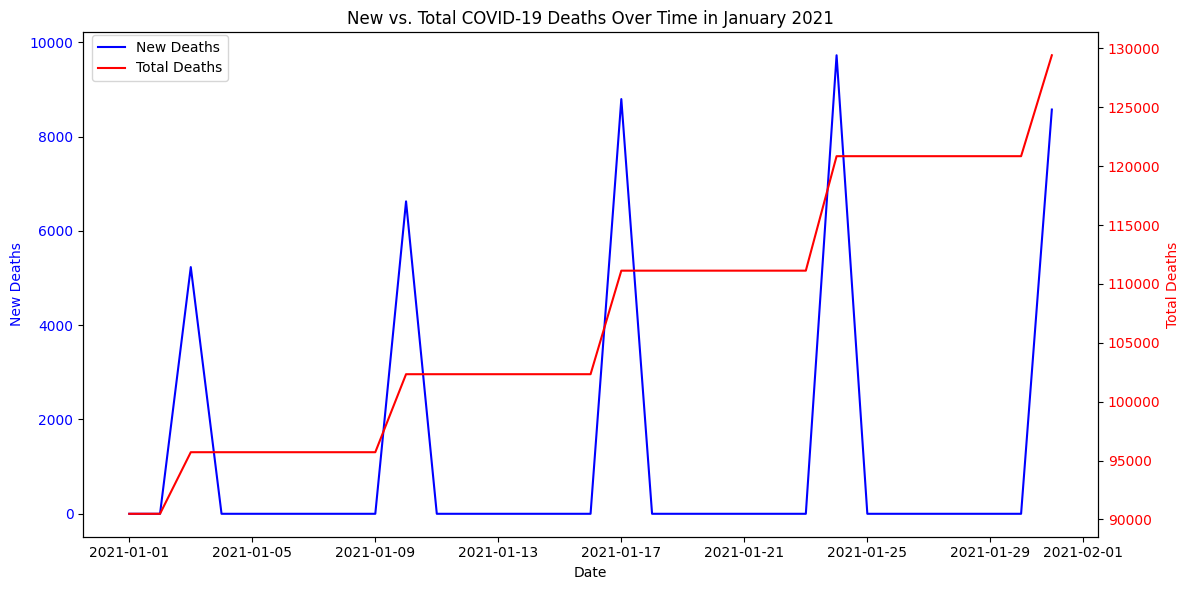

In [ ]:
# New vs. Total COVID-19 deaths Over Time - MONTH

# Select data for a specific month
start_date = '2021-01-01'
end_date = '2021-01-31'
january_2020_data = cleaned_uk_df_2[(cleaned_uk_df_2['date'] >= start_date) & (cleaned_uk_df_2['date'] <= end_date)]

# Group data by date and sum new cases and total cases
cases_over_time = january_2020_data.groupby('date').agg({'new_deaths': 'sum', 'total_deaths': 'sum'})

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot new cases on the first y-axis
ax1.plot(cases_over_time.index, cases_over_time['new_deaths'], color='blue', label='New Deaths')
ax1.set_xlabel('Date')
ax1.set_ylabel('New Deaths', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for total cases
ax2 = ax1.twinx()
ax2.plot(cases_over_time.index, cases_over_time['total_deaths'], color='red', label='Total Deaths')
ax2.set_ylabel('Total Deaths', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Customize the plot
plt.title('New vs. Total COVID-19 Deaths Over Time in January 2021')
fig.legend(loc="upper left", bbox_to_anchor=(0.075, 0.945))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Filter out rows where 'new_deaths' is zero
non_zero_deaths = cleaned_uk_df_2[cleaned_uk_df_2['new_deaths'] != 0]

# Get the first 20 non-zero 'new_deaths' values and their corresponding dates
first_non_zero = non_zero_deaths[['date', 'new_deaths']].head(20)

first_non_zero

,date,new_deaths
401805,2020-02-02,1.0
401812,2020-02-09,1.0
401833,2020-03-01,1.0
401840,2020-03-08,6.0
401847,2020-03-15,46.0
401854,2020-03-22,429.0
401861,2020-03-29,2005.0
401868,2020-04-05,5622.0
401875,2020-04-12,8974.0
401882,2020-04-19,9082.0


In [ ]:
# Calculate the difference in dates between consecutive entries
date_diffs = first_non_zero['date'].diff().dt.days

date_diffs

,date
401805,NaN
401812,7.0
401833,21.0
401840,7.0
401847,7.0
401854,7.0
401861,7.0
401868,7.0
401875,7.0
401882,7.0


In [ ]:
# Remove rows where 'new_deaths' is zero
cleaned_uk_df_3 = cleaned_uk_df_2[cleaned_uk_df_2['new_deaths'] != 0]

cleaned_uk_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 401805 to 403163
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        193 non-null    datetime64[ns]
 1   location                    193 non-null    object        
 2   total_cases                 193 non-null    float64       
 3   new_cases                   193 non-null    float64       
 4   total_deaths                193 non-null    float64       
 5   new_deaths                  193 non-null    float64       
 6   population_density          193 non-null    float64       
 7   median_age                  193 non-null    float64       
 8   aged_65_older               193 non-null    float64       
 9   aged_70_older               193 non-null    float64       
 10  gdp_per_capita              193 non-null    float64       
 11  extreme_poverty             193 non-null    float64    

In [ ]:
cleaned_uk_df_3.head()

,date,location,total_cases,new_cases,total_deaths,new_deaths,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
401805,2020-02-02,United Kingdom,1.0,1.0,1.0,1.0,272.9,40.8,18.52,12.53,39753.24,0.2,122.14,4.28,20.0,24.7,2.54,81.32,0.93,67508936
401812,2020-02-09,United Kingdom,21.0,20.0,2.0,1.0,272.9,40.8,18.52,12.53,39753.24,0.2,122.14,4.28,20.0,24.7,2.54,81.32,0.93,67508936
401833,2020-03-01,United Kingdom,68.0,33.0,3.0,1.0,272.9,40.8,18.52,12.53,39753.24,0.2,122.14,4.28,20.0,24.7,2.54,81.32,0.93,67508936
401840,2020-03-08,United Kingdom,379.0,311.0,9.0,6.0,272.9,40.8,18.52,12.53,39753.24,0.2,122.14,4.28,20.0,24.7,2.54,81.32,0.93,67508936
401847,2020-03-15,United Kingdom,2280.0,1901.0,55.0,46.0,272.9,40.8,18.52,12.53,39753.24,0.2,122.14,4.28,20.0,24.7,2.54,81.32,0.93,67508936


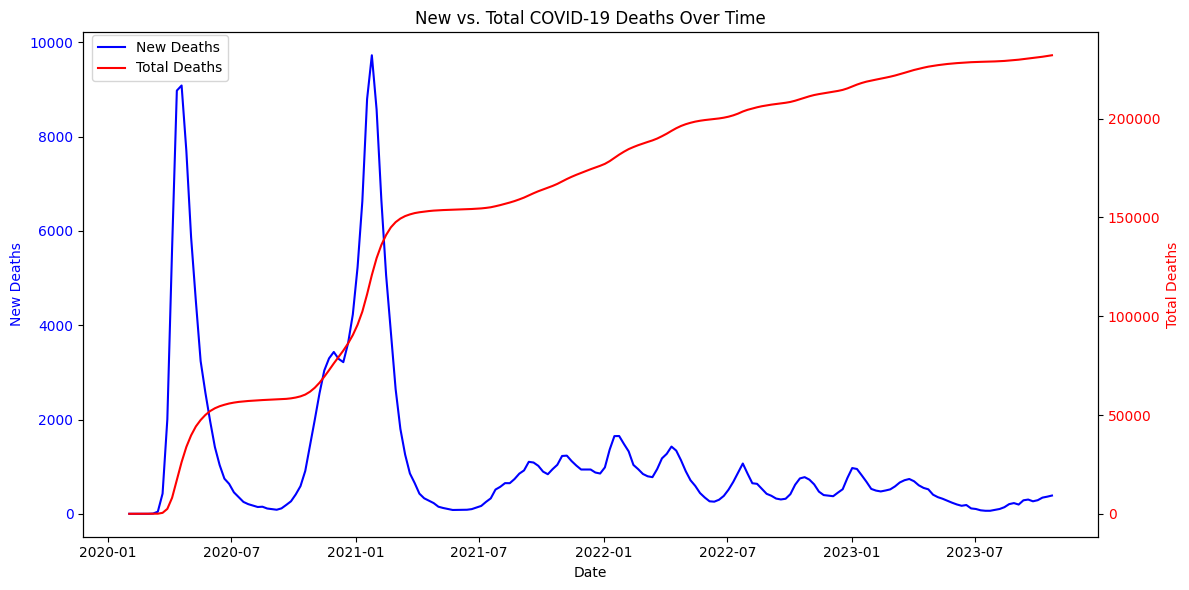

In [ ]:
# New vs. Total COVID-19 deaths Over Time

# Group data by date and sum new cases and total cases
cases_over_time = cleaned_uk_df_3.groupby('date').agg({'new_deaths': 'sum', 'total_deaths': 'sum'})

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot new cases on the first y-axis
ax1.plot(cases_over_time.index, cases_over_time['new_deaths'], color='blue', label='New Deaths')
ax1.set_xlabel('Date')
ax1.set_ylabel('New Deaths', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for total cases
ax2 = ax1.twinx()
ax2.plot(cases_over_time.index, cases_over_time['total_deaths'], color='red', label='Total Deaths')
ax2.set_ylabel('Total Deaths', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Customize the plot
plt.title('New vs. Total COVID-19 Deaths Over Time')
fig.legend(loc="upper left", bbox_to_anchor=(0.075, 0.945))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Step 4: LSTM Model**

In [ ]:
## Data Pre-processing

# Filter data from 2020-02-02 onwards
data = cleaned_uk_df_3[cleaned_uk_df_3['date'] >= '2020-02-02']
data.set_index('date', inplace=True)

# Selecting target variable
target_col = 'new_deaths'
target_data = data[[target_col]].values

# Normalising the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(target_data)

## Sequence Generation for LSTM Input

# Function to create sequences for LSTM input
def create_sequences(data, sequence_length=30):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Create sequences
sequence_length = 30
X, y = create_sequences(scaled_data, sequence_length)

# Split into training and validation sets
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

## Model Architecture

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

## Training and Evaluation

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0361 - val_loss: 0.0020
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0224 - val_loss: 0.0046
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0198 - val_loss: 0.0030
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0174 - val_loss: 0.0024
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0153 - val_loss: 0.0037
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0134 - val_loss: 0.0060
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0128 - val_loss: 0.0060
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0120 - val_loss: 0.0046
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0112 - val_loss: 0.0039
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0106 - val_loss: 0.0036
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0101 - val_loss: 0.0030


In [ ]:
# Making predictions
predictions = model.predict(X_val)
predictions = scaler.inverse_transform(predictions)
y_val_rescaled = scaler.inverse_transform(y_val.reshape(-1, 1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


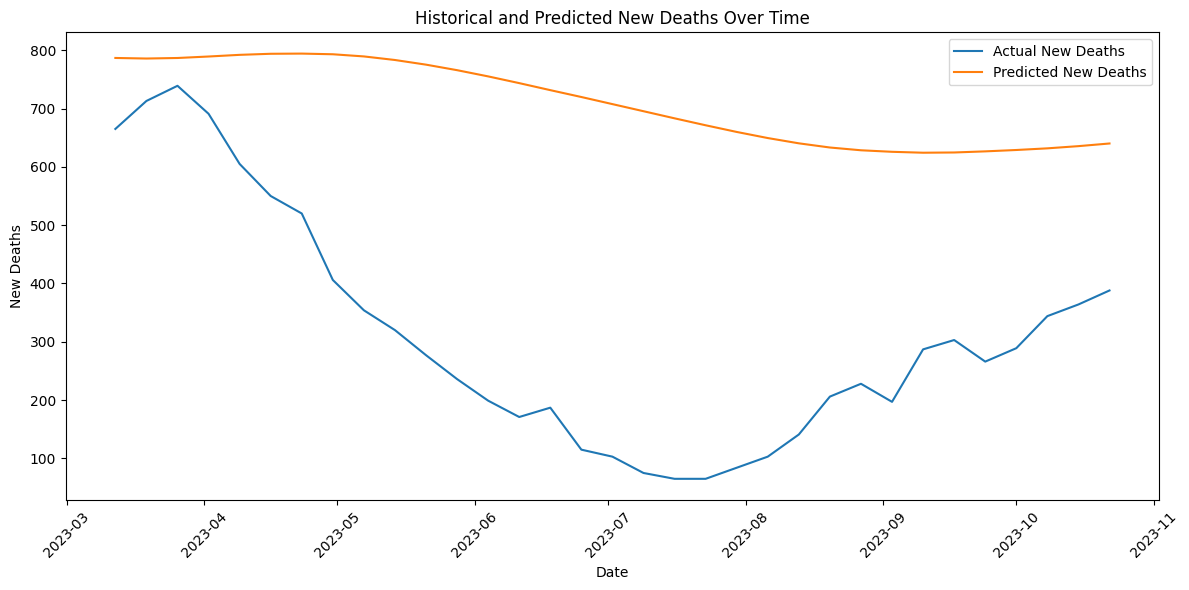

In [ ]:
# Plotting historical and predicted data over time (between 12th March 2023 and 22nd October 2023)
plt.figure(figsize=(12, 6))
plt.plot(data.index[split + sequence_length:], y_val_rescaled, label='Actual New Deaths')
plt.plot(data.index[split + sequence_length:], predictions, label='Predicted New Deaths')
plt.title('Historical and Predicted New Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Step 5: Performance Assessment**

In [ ]:
# Accuracy metrics

mae = mean_absolute_error(y_val_rescaled, predictions)
mse = mean_squared_error(y_val_rescaled, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_rescaled, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 401.98
Mean Squared Error (MSE): 192835.49
Root Mean Squared Error (RMSE): 439.13
R² Score: -3.92


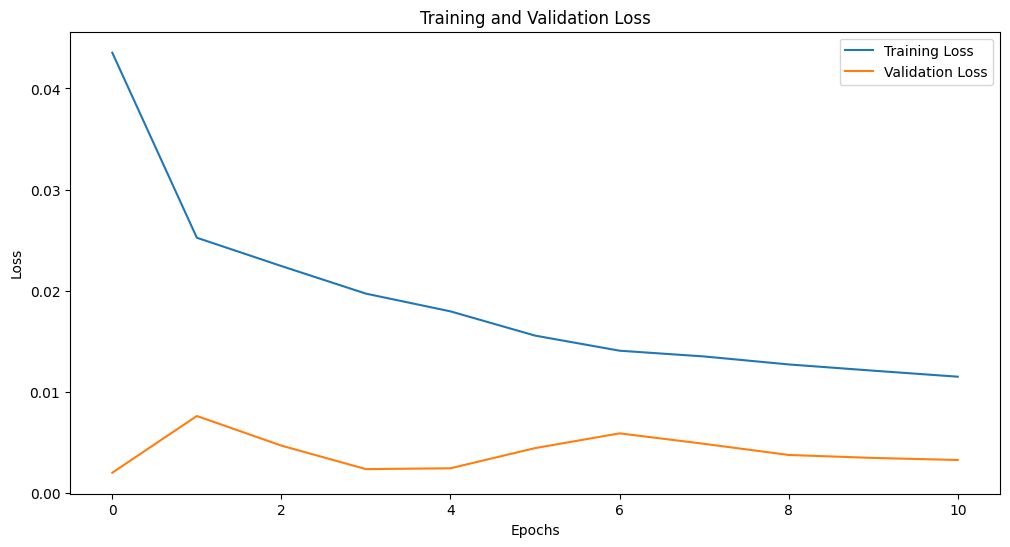

In [ ]:
# Evaluate the model
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Step 6: Explainable AI (XAI)**

  0%|          | 0/1 [00:00<?, ?it/s]

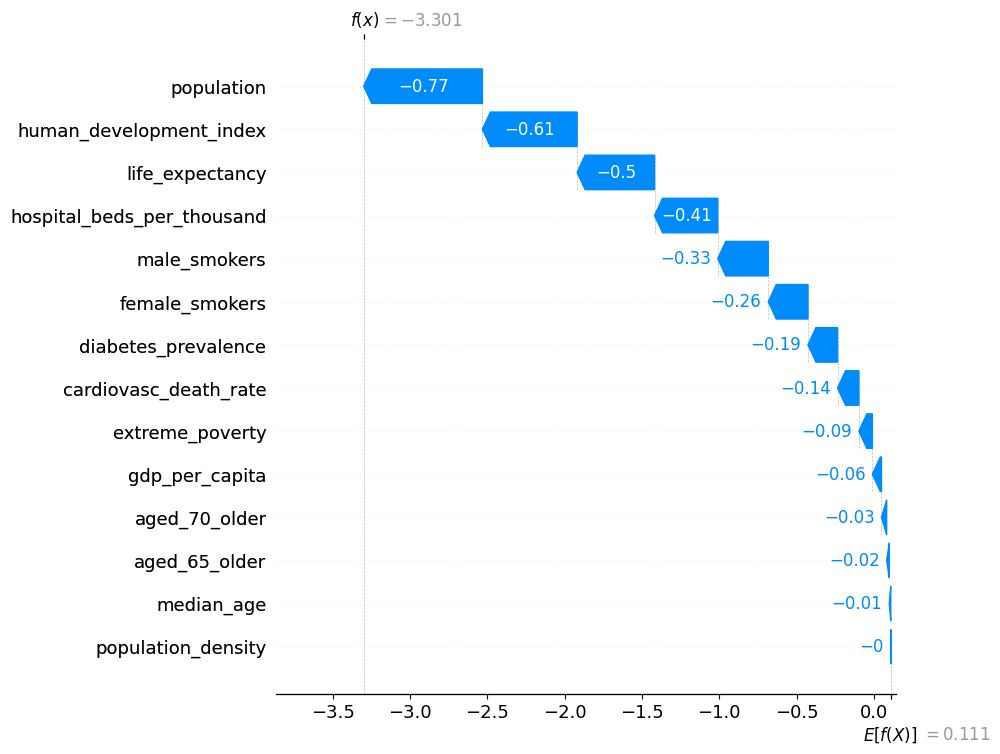

In [ ]:
# Define function for SHAP that reshapes input before making predictions
def lstm_predict(flat_data):
    # Reshape to 3D for LSTM
    reshaped_data = flat_data.reshape((-1, sequence_length, 1))
    # Flatten output
    return model.predict(reshaped_data, verbose=0).flatten()

# Select a subset of training data and flatten it for SHAP
background_samples = X_train[:50].reshape(50, -1)

# Create KernelExplainer
explainer = shap.KernelExplainer(lstm_predict, background_samples)

# Check if fixed_sample_idx is valid
fixed_sample_idx = min(42, len(X_val) - 1)

# If `X_val` is too small, select the middle sample instead
if fixed_sample_idx < 0:
    raise ValueError("Validation data is too small for SHAP analysis.")

sample_input = X_val[fixed_sample_idx:fixed_sample_idx+1].reshape(1, -1)

# Compute SHAP values (using explainer)
shap_values = explainer.shap_values(sample_input)

# Select only the first 14 SHAP values
shap_values_reshaped = shap_values[0][:14]

# Define the list of feature names you want to plot
feature_names = [
    'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
    'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
    'diabetes_prevalence', 'female_smokers', 'male_smokers',
    'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index',
    'population'
]

# Scale SHAP values for better visualisation
scaled_shap_values = shap_values_reshaped * 1000

# Plot SHAP values with features as labels on the y-axis
shap.plots.waterfall(shap.Explanation(
    values=scaled_shap_values,
    base_values=explainer.expected_value,
    feature_names=feature_names),
    max_display=14)